In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import numpy as np

In [2]:
from fredapi import Fred
fred = Fred('44810fd8f49a92c63950a408001a5b27')

In [7]:
df = fred.get_series_all_releases('FEDFUNDS')
df.tail()

,realtime_start,date,value
884,2023-10-02 00:00:00,2023-09-01 00:00:00,5.33
885,2023-11-01 00:00:00,2023-10-01 00:00:00,5.33
886,2023-12-01 00:00:00,2023-11-01 00:00:00,5.33
887,2024-01-02 00:00:00,2023-12-01 00:00:00,5.33
888,2024-02-01 00:00:00,2024-01-01 00:00:00,5.33


In [8]:
df['Time Gap'] = df['realtime_start'] - df['date']

In [9]:
df

,realtime_start,date,value,Time Gap
0,1996-12-03 00:00:00,1954-07-01 00:00:00,0.8,"15496 days, 0:00:00"
1,1996-12-03 00:00:00,1954-08-01 00:00:00,1.22,"15465 days, 0:00:00"
2,1996-12-03 00:00:00,1954-09-01 00:00:00,1.06,"15434 days, 0:00:00"
3,2020-07-21 00:00:00,1954-09-01 00:00:00,1.07,"24065 days, 0:00:00"
4,2020-08-05 00:00:00,1954-09-01 00:00:00,1.06,"24080 days, 0:00:00"
...,...,...,...,...
884,2023-10-02 00:00:00,2023-09-01 00:00:00,5.33,"31 days, 0:00:00"
885,2023-11-01 00:00:00,2023-10-01 00:00:00,5.33,"31 days, 0:00:00"
886,2023-12-01 00:00:00,2023-11-01 00:00:00,5.33,"30 days, 0:00:00"
887,2024-01-02 00:00:00,2023-12-01 00:00:00,5.33,"32 days, 0:00:00"


<Axes: >

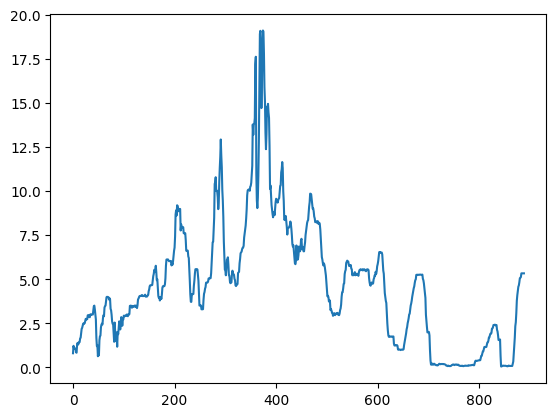

In [21]:
df['value'].plot()

In [34]:
df = pd.DataFrame(fred.get_series('T10Y3M'))

In [35]:
df[0]

1982-01-04    2.32
1982-01-05    2.24
1982-01-06    2.43
1982-01-07    2.46
1982-01-08    2.50
              ... 
2024-02-14   -1.16
2024-02-15   -1.19
2024-02-16   -1.14
2024-02-19     NaN
2024-02-20   -1.17
Name: 0, Length: 10992, dtype: float64

In [36]:
import plotly.express as px

fig = px.line(df, x=df.index, y=0, title='T10Y3M')
fig.show()

In [40]:
import yfinance as yf 

In [41]:
# Mendapatkan data dari FRED dan Yahoo Finance
df_fred = pd.DataFrame(fred.get_series('T10Y3M'))
df_yfinance = yf.download("SPGI")

# Menggabungkan kedua dataset berdasarkan tanggal
df_merged = pd.merge(df_fred, df_yfinance, how='inner', left_index=True, right_index=True)

[*********************100%***********************]  1 of 1 completed


In [47]:
df_merged

,0,Open,High,Low,Close,Adj Close,Volume
1982-01-04,2.32,0.000000,3.250000,3.218750,3.218750,1.339760,67200
1982-01-05,2.24,0.000000,3.203125,3.148438,3.164063,1.316997,294400
1982-01-06,2.43,0.000000,3.171875,3.125000,3.125000,1.300738,414400
1982-01-07,2.46,0.000000,3.109375,3.046875,3.062500,1.274723,216000
1982-01-08,2.50,0.000000,3.078125,3.031250,3.031250,1.261715,372800
...,...,...,...,...,...,...,...
2024-02-13,-1.14,421.839996,426.260010,420.130005,422.480011,422.480011,1888800
2024-02-14,-1.16,424.450012,425.500000,417.470001,421.209991,421.209991,1621300
2024-02-15,-1.19,423.489990,426.660004,422.079987,424.489990,424.489990,1378100
2024-02-16,-1.14,422.000000,427.510010,421.859985,423.570007,423.570007,1813400


In [55]:
df_merged['T10Y3M'] = df_merged[0]

In [44]:
# Membuat plot menggunakan Plotly
fig = go.Figure()

# Menambahkan scatter plot untuk korelasi time series
fig.add_trace(go.Scatter(x=df_merged.index, y=df_merged[0], mode='lines', name='T10Y3M'))
fig.add_trace(go.Scatter(x=df_merged.index, y=df_merged['Close'], mode='lines', name='SPGI'))

# Menambahkan judul dan label sumbu
fig.update_layout(title='Korelasi Time Series Antara T10Y3M dan SPGI',
                   xaxis_title='Tanggal',
                   yaxis_title='Nilai')

# Menampilkan plot
fig.show()


In [61]:
# Menggunakan metode corr() untuk menghitung korelasi antara kolom 'T10Y3M' dan 'Adj Close'
correlation = df_merged['T10Y3M'].corr(df_merged['Adj Close'])


In [62]:
correlation

-0.4237232164852959

In [72]:
# Menghitung rolling correlation berdasarkan indeks
rolling_correlation = df_merged['T10Y3M'].rolling(window=100).corr(df_merged['Adj Close'])

# Membuat plot menggunakan Plotly
fig = go.Figure()

# Menambahkan scatter plot untuk rolling correlation
fig.add_trace(go.Scatter(x=rolling_correlation.index, y=rolling_correlation, mode='lines', name='Rolling Correlation'))

# Menambahkan judul dan label sumbu
fig.update_layout(title='Rolling Correlation antara T10Y3M dan Adj Close',
                   xaxis_title='Tanggal',
                   yaxis_title='Rolling Correlation')

# Menampilkan plot
fig.show()